In [1]:
# Importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# loading dataset
pressure = pd.read_csv('pressure.csv', sep=',')

In [3]:
pressure.head()

,Unnamed: 0,Upper,Down,Pulse
0,0,138.0,80.0,75.0
1,1,129.0,73.0,72.0
2,2,123.0,75.0,72.0
3,3,161.0,91.0,73.0
4,4,145.0,87.0,73.0


In [4]:
pressure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1197 non-null   int64  
 1   Upper       1196 non-null   float64
 2   Down        1196 non-null   float64
 3   Pulse       1191 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 37.5 KB


In [5]:
max(pressure['Pulse'])

135.0

In [6]:
min(pressure['Pulse'])

47.0

In [7]:
pressure.isnull().sum()

Unnamed: 0    0
Upper         1
Down          1
Pulse         6
dtype: int64

In [8]:
# Preprocessing Data
bins = (3, 74, 77, 135)
group_names = ['low', 'good', 'high']
pressure['Pulse'] = pd.cut(pressure['Pulse'], bins = bins, labels = group_names)
pressure['Pulse'].unique()
pressure['Pulse'].dropna()

0       good
1        low
2        low
3        low
4        low
        ... 
1192     low
1193     low
1194     low
1195     low
1196     low
Name: Pulse, Length: 1191, dtype: category
Categories (3, object): ['low' < 'good' < 'high']

In [9]:
# low = 0 and good = 1 and high = 2
label_quality = LabelEncoder()

In [10]:
pressure['Pulse'] = label_quality.fit_transform(pressure['Pulse'])

In [19]:
pressure = pressure.dropna()

In [12]:
pressure.head()

,Unnamed: 0,Upper,Down,Pulse
0,0,138.0,80.0,0
1,1,129.0,73.0,2
2,2,123.0,75.0,2
3,3,161.0,91.0,2
4,4,145.0,87.0,2


In [13]:
pressure['Pulse'].value_counts()

2    702
1    352
0    137
3      6
Name: Pulse, dtype: int64

c:\users\sewer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pulse', ylabel='count'>

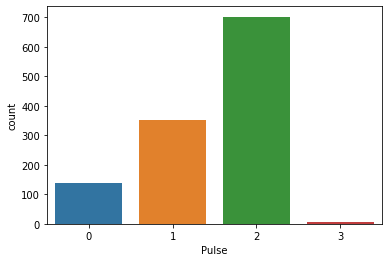

In [14]:
sns.countplot(pressure['Pulse'])

In [15]:
X = pressure.drop('Pulse', axis=1)  # predict
y = pressure['Pulse']               # df

In [16]:
# Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
# Applying standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Random forest classifier

In [20]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.pred(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').